Expression levels of $77$ proteins obtained from $38$ normal genotype control mice  and from $34$ of their trisomic littermates, both with and without treatment with the drug memantine and with and without the stimulation to learn.

The data is from Higuera C, Gardiner KJ, Cios KJ. "Self-Organizing Feature Maps Identify Proteins Critical to Learning in a Mouse Model of Down Syndrome", PLoS One (2015)

In [1]:
import numpy as np
import pandas as pd

import networkx as nx

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import clustergraph.clustergraph as cg
from clustergraph.utils import get_clusters_from_scikit
import clustergraph.plot_graph as pg

## Read and process data

In [2]:
df = pd.read_csv("data/mice_protein_no_NaN.csv")
X = df.iloc[:, :-1].to_numpy()  # drop of the labels column


def get_learning_outcome(lab):
    if lab == "c-CS-s" or lab == "c-CS-m":
        return "Normal"

    elif lab == "t-CS-s":
        return "Failed"

    elif lab == "t-CS-m":
        return "Rescued"

    else:
        return "No_learning"


labels = [get_learning_outcome(lab) for lab in df["class"]]
df["label"] = labels
df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class,label
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.132539,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,c-CS-m,Normal
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.132539,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,c-CS-m,Normal
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.132539,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,c-CS-m,Normal
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.132539,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,c-CS-m,Normal
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.132539,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,c-CS-m,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.137082,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,t-SC-s,No_learning
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.137082,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,t-SC-s,No_learning
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.137082,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,t-SC-s,No_learning
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.137082,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,t-SC-s,No_learning


## Clustering

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X.shape)

pca = PCA(0.95)
X_pca = pca.fit_transform(X)

model = KMeans(18, random_state=42)
pred = model.fit_predict(X_pca)

(1080, 77)


## ClusterGraph

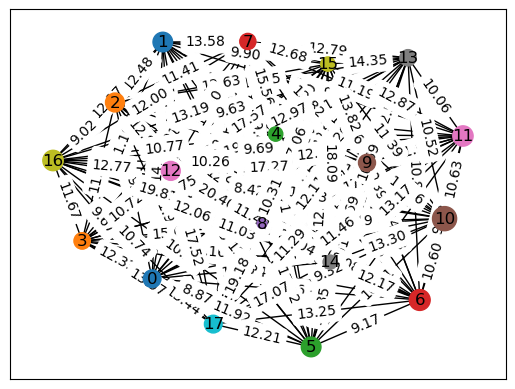

In [4]:
cluster_g = cg.ClusterGraph(
    clusters=get_clusters_from_scikit(pred), X=X_pca, metric_clusters="average"
)

# Coloring the graph
cluster_g.color_graph(
    node_color_labels=pred,
    node_palette=cm.get_cmap("tab10"),
)

pg.draw_graph(cluster_g.Graph, size_nodes=1000, random_state=42)

## Connectivity pruning

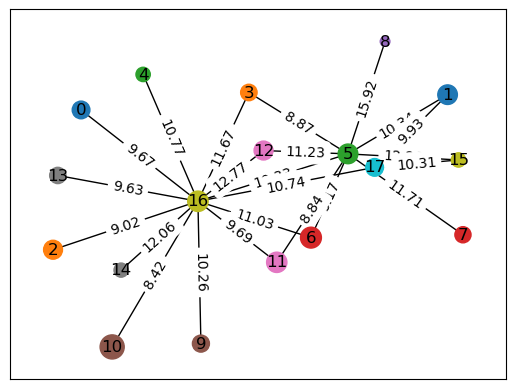

In [5]:
connectivity_graph, conn = cluster_g.prune_conn(score=True)

connectivity_graph = cluster_g.prune_conn(nb_edge_pruned=130)
pg.draw_graph(connectivity_graph, size_nodes=1000, random_state=42)

## Pie chart visualization

In [9]:
cluster_color_dict = {
    "Failed": "#D81B60",
    "No_learning": "#FFC107",
    "Normal": "#1E88E5",
    "Rescued": "#004D40",
}

clusters_hexa = np.array([cluster_color_dict[c] for c in labels])

import matplotlib.patches as mpatches

keys = list(cluster_color_dict)
patches = [mpatches.Patch(color=cluster_color_dict[k], label=k) for k in keys]

In [11]:
# Coloring the graph with the labels
cluster_g.color_graph(
    node_color_labels=clusters_hexa,  # here the labels already contain the colors
)

connectivity_graph = cluster_g.prune_conn(nb_edge_pruned=130)

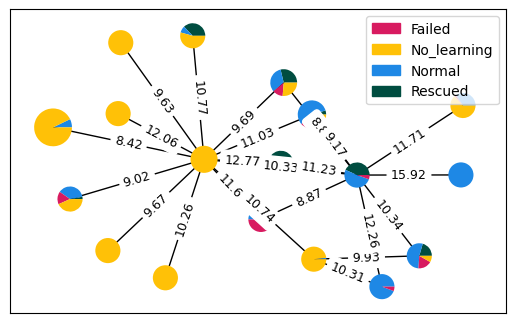

In [14]:
nb = len(list(connectivity_graph.edges))
pg.draw_graph_pie(
    connectivity_graph,
    nb_edges=nb,
    random_state=40,
    variable="weight_plot",
    size_nodes=0.06,
    font_size=8,
)
plt.legend(handles=patches)
plt.show()

# Other methods

In [15]:
import umap as um

uma = um.UMAP(n_neighbors=15, random_state=42)
X_umap = uma.fit_transform(X)

/Users/dgurnari/opt/anaconda3/envs/cg/lib/python3.12/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [16]:
import phate

phate_operator = phate.PHATE(n_jobs=-2)
X_phate = phate_operator.fit_transform(X)

Calculating PHATE...
  Running PHATE on 1080 observations and 77 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 0.07 seconds.
  Calculating optimal t...
    Automatically selected t = 22
  Calculated optimal t in 0.60 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.13 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.46 seconds.
Calculated PHATE in 1.27 seconds.


In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tnse = tsne.fit_transform(X)

## All combined

In [18]:
for u, v, data in connectivity_graph.edges(data=True):
    connectivity_graph.edges[(u, v)]["spring"] = 1 / data["weight_plot"] * 10

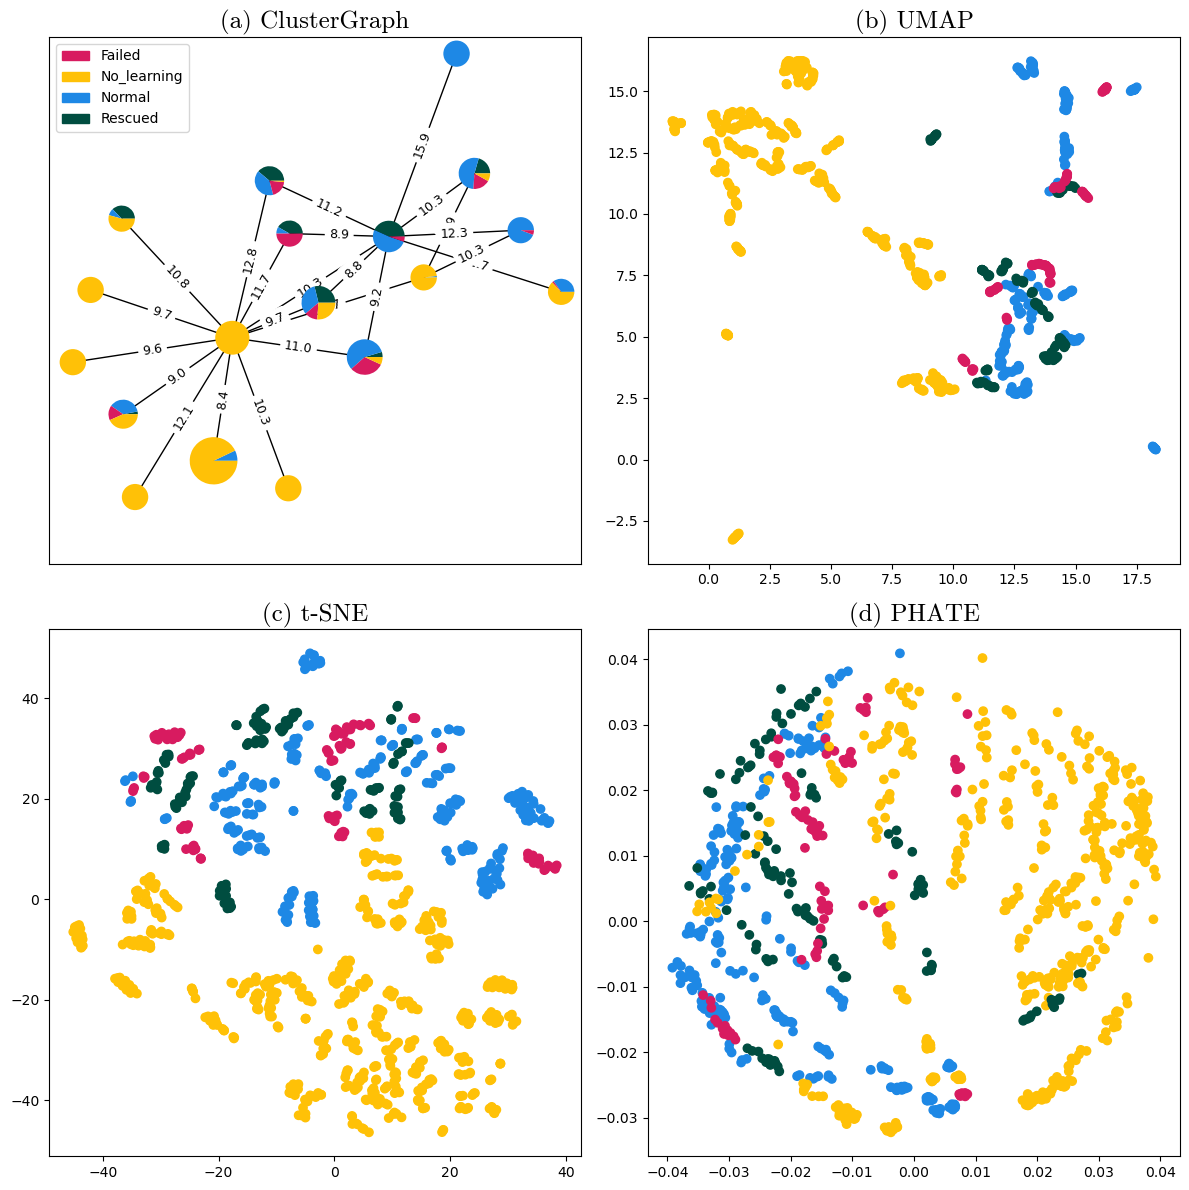

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

pos = nx.spring_layout(
    connectivity_graph, seed=42, iterations=100, scale=1, center=(0, 0), weight="spring"
)

nx.draw_networkx_edges(connectivity_graph, pos=pos, ax=axs[0, 0])

edge_labels = {
    (u, v): "{:.1f}".format(data["weight_plot"])
    for u, v, data in connectivity_graph.edges(data=True)
}
nx.draw_networkx_edge_labels(
    connectivity_graph,
    pos,
    edge_labels=edge_labels,
    font_color="black",
    font_size=9,
    ax=axs[0, 0],
)

xlim = axs[0, 0].get_xlim()
ylim = axs[0, 0].get_ylim()

for node, data in connectivity_graph.nodes(data=True):

    attributes = connectivity_graph.nodes[node]["data_perc_labels"]
    keys = list(attributes)
    attrs = [attributes[k] for k in keys]

    axs[0, 0].pie(
        attrs,
        center=pos[node],
        colors=[k for k in keys],
        radius=max(data["size_plot"] * 0.3, 0.05),
        frame=True,
    )


axs[0, 0].legend(handles=patches, loc="upper left")

axs[0, 0].set_aspect("auto")
xlim = (xlim[0] * 0.9, xlim[1] * 0.9)
axs[0, 0].set_xlim(xlim)
axs[0, 0].set_ylim((-(xlim[1] - xlim[0]) / 2, (xlim[1] - xlim[0]) / 2))


axs[0, 0].set_title("(a) ClusterGraph", fontname="serif", family="cmr10", size=18)

axs[0, 1].scatter(X_umap[:, 0], X_umap[:, 1], c=clusters_hexa)
axs[0, 1].set_title("(b) UMAP", fontname="serif", family="cmr10", size=18)


axs[1, 0].scatter(X_tnse[:, 0], X_tnse[:, 1], c=clusters_hexa)
axs[1, 0].set_title("(c) t-SNE", fontname="serif", family="cmr10", size=18)

axs[1, 1].scatter(X_phate[:, 0], X_phate[:, 1], c=clusters_hexa)
axs[1, 1].set_title("(d) PHATE", fontname="serif", family="cmr10", size=18)

plt.tight_layout()
# plt.savefig("mice.pdf")
plt.show()